In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("pbmc35.h5ad")
adata2 = sc.read_h5ad("pbmc35.h5ad")
adata_list = [adata, adata2]
adata_concat = sc.concat(adata_list, label='batch', keys=['batch1', 'batch2'][:len(adata_list)])
sc.tl.pca(adata_concat)

/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
sc.external.pp.bbknn(adata_concat, batch_key='batch')

/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/umap/distanc

In [4]:
adata_concat

AnnData object with n_obs × n_vars = 5400 × 32738
    obs: 'batch'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/duke/anaconda3/envs/webapp/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


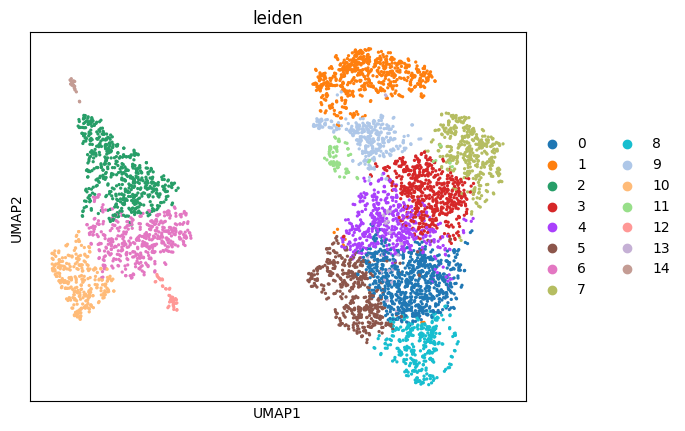

In [5]:
sc.pp.neighbors(adata_concat,use_rep="X_pca")
sc.tl.umap(adata_concat)
sc.tl.leiden(adata_concat,resolution=0.5)
sc.pl.umap(adata_concat,color=["leiden"])

In [ ]:
        # Perform batch correction
        if batch_correction_method == 'combat':
            sc.pp.combat(adata_concat, key='batch')
        elif batch_correction_method == 'scanorama':
            sc.external.pp.scanorama_integrate(adata_concat, key='batch')
        elif batch_correction_method == 'bbknn':
            sc.external.pp.bbknn(adata_concat, batch_key='batch')
        elif batch_correction_method == 'harmony':
            sc.external.pp.harmony_integrate(adata_concat, key='batch')